In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [92]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [93]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#In this section, we define the function make_graph. 
#You don't have to know how the function works, you should only care about the inputs. 
#It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with 
#revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.



In [94]:
#Question 1: Use yfinance to Extract Stock Data

#Using the Ticker function enter the ticker symbol of the stock 
#we want to extract data on to create a ticker object. 
#The stock is Tesla and its ticker symbol is TSLA.

Tesla = yf.Ticker("TSLA")


In [95]:
#Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. 
#Set the period parameter to max so we get information for the maximum amount of time.

tesla_data = Tesla.history(period="max")

In [96]:
#Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and 
#display the first five rows of the tesla_data dataframe using the head function. 
#Take a screenshot of the results and code from the beginning of Question 1 to the results below.

tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [97]:
#Q1

Tesla = yf.Ticker("TSLA")
tesla_data = Tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [98]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data
#Use the requests library to download the webpage 
#https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm 
#Save the text of the response as a variable named html_data.

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [99]:
#Parse the html data using beautiful_soup.
soup = BeautifulSoup(html_data, 'html.parser')

In [121]:
#Using BeautifulSoup or the read_html function extract the table with Tesla Revenue 
#and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.



In [119]:
#tesla_revenue = soup.find("table", attrs={"class": "table table-striped"})
# Extract the table rows
table_rows = soup.find_all("tr")

# Store the data into a DataFrame
tesla_revenue_data = pd.DataFrame(columns=["Date", "Revenue"])

for row in table_rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        tesla_revenue_data = tesla_revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index=True)

#print(tesla_revenue_data)


In [108]:
#tesla_revenue_data["Revenue"] = tesla_revenue_data["Revenue"].apply(lambda x: x.replace(",", "").replace("$", ""))
# Remove comma and dollar sign from Revenue column
#tesla_revenue_data["Revenue"] = tesla_revenue_data["Revenue"].str.replace(",", "").str.replace("$", "")

# Remove null or empty strings from Revenue column
#tesla_revenue_data = tesla_revenue_data[tesla_revenue_data["Revenue"] != ""]

#Display the last 5 row of the tesla_revenue dataframe using the tail function.
#Take a screenshot of the results.

#print(tesla_revenue_data.tail())


In [123]:
#Q2
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
table_rows = soup.find_all("tr")

# Store the data into a DataFrame
tesla_revenue_data = pd.DataFrame(columns=["Date", "Revenue"])

for row in table_rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        tesla_revenue_data = tesla_revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index=True)
tesla_revenue_data["Revenue"] = tesla_revenue_data["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue_data = tesla_revenue_data[tesla_revenue_data["Revenue"] != ""]
print(tesla_revenue_data.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [103]:
#Question 3: Use yfinance to Extract Stock Data
#Using the Ticker function enter the ticker symbol of the stock 
#we want to extract data on to create a ticker object. 
#The stock is GameStop and its ticker symbol is GME.

GameStop = yf.Ticker("GME")

In [104]:
#Using the ticker object and the function history extract stock information and 
#save it in a dataframe named gme_data. Set the period parameter to max 
#so we get information for the maximum amount of time.

gme_data = GameStop.history(period="max")

In [65]:
#Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and 
#display the first five rows of the gme_data dataframe using the head function.
#Take a screenshot of the results and code from the beginning of Question 3 to the results below.

gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [66]:
#Q3

GameStop = yf.Ticker("GME")
gme_data = GameStop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [67]:
#Question 4: Use Webscraping to Extract GME Revenue Data
#Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. 
#Save the text of the response as a variable named html_data.
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url2).text


In [68]:
#Parse the html data using beautiful_soup.
soup = BeautifulSoup(html_data, 'html.parser')

In [69]:
#Q4

url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url2).text
soup = BeautifulSoup(html_data, 'html.parser')
table_rows = soup.find_all("tr")
gme_revenue_data = pd.DataFrame(columns=["Date", "Revenue"])

for row in table_rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.replace(",", "").replace("$", "")
        gme_revenue_data = gme_revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gme_revenue_data["Revenue"] = gme_revenue_data["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue_data = gme_revenue_data[gme_revenue_data["Revenue"] != ""]
gme_revenue_data.tail()



,Date,Revenue
73,2006-01-31,1667
74,2005-10-31,534
75,2005-07-31,416
76,2005-04-30,475
77,2005-01-31,709


In [116]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    
    if revenue_data is not None and 'Date' in revenue_data.columns and 'Revenue' in revenue_data.columns:
        revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
        fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    
    fig.show()



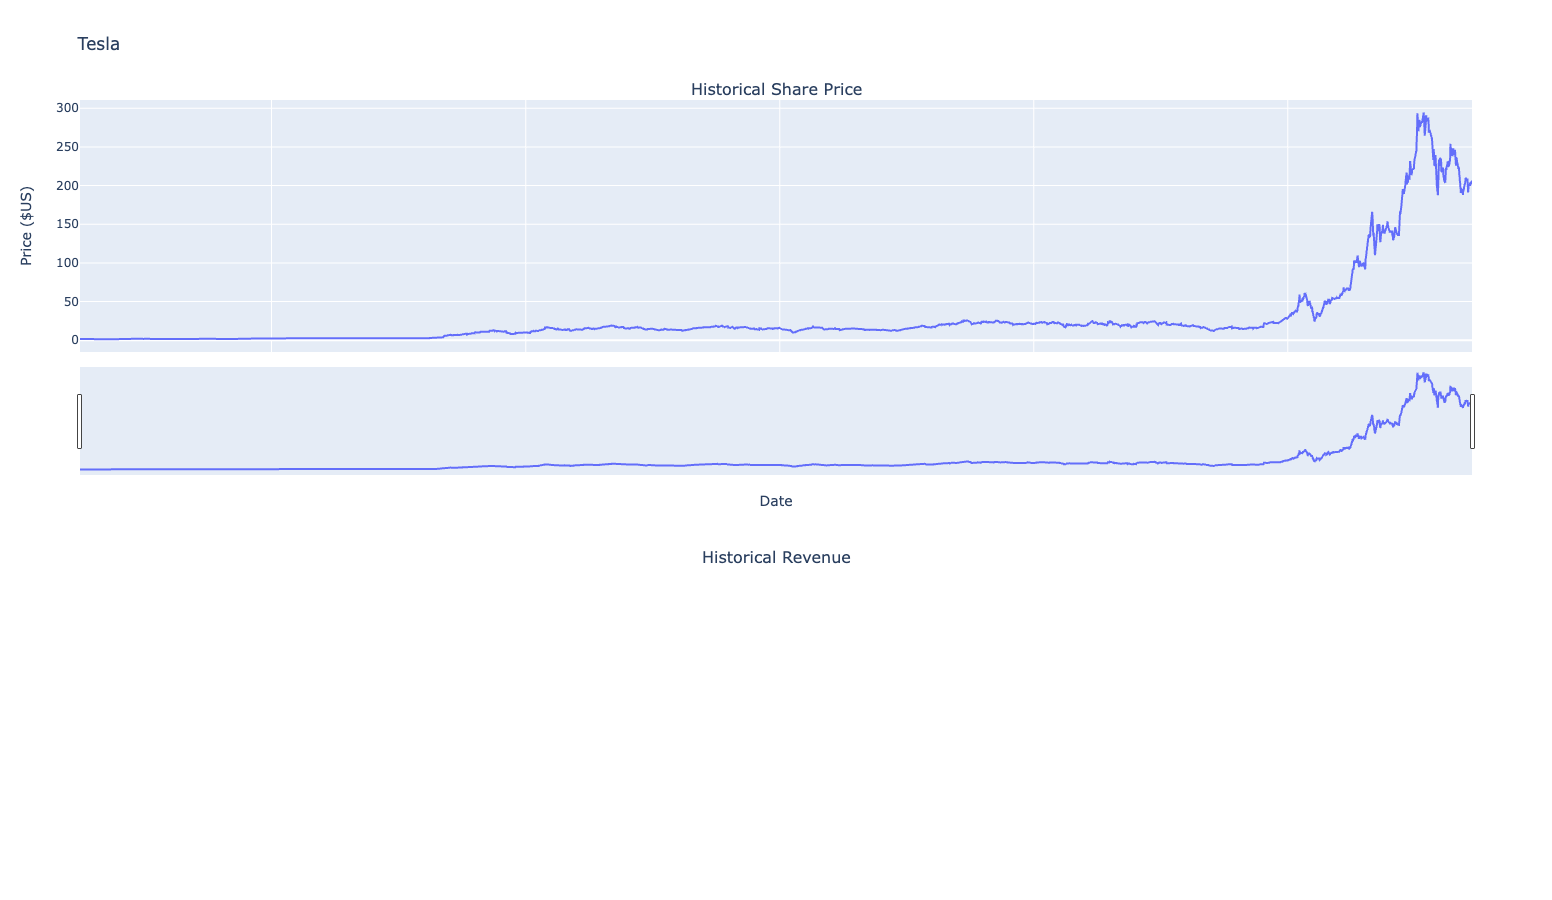

In [111]:
make_graph(tesla_data, tesla_revenue, 'Tesla')